In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.svm import SVC, libsvm
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import random

In [202]:
# The training data
train = pd.read_csv('C://Users//Payam//Documents//1_Data_Science//Titanic//train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
# Contains only the test features and not the target 
test = pd.read_csv('C://Users//Payam//Documents//1_Data_Science//Titanic//test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [204]:
# Contains only the test features and not the target 
test = pd.read_csv('C://Users//Payam//Documents//1_Data_Science//Titanic//test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [205]:
# Contains the survival data for the target set
target = pd.read_csv('C://Users//Payam//Documents//1_Data_Science//Titanic//gender_submission.csv')
target.head()
# Attaching the 'Survived Column to the test set
test['Survived'] = target.Survived

In [206]:

target.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [207]:
# Checks to see if there's any null entries
train.Pclass.isnull().any()

False

In [208]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [209]:
# Filling in the null values with the average value of the column (only one of the possible approaches)
train.Age[train.Age.isnull()] = train.Age.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [210]:
train.Age.isnull().any()

False

In [211]:
# to test the balance of the data
train.groupby('Survived').size()
# the data is not balanced in terms of the target

Survived
0    549
1    342
dtype: int64

In [212]:
# choosing a balanced training set.
train_bal = train.groupby('Survived').apply(lambda x: x.sample(342))

In [213]:
#train_bal.head()
#train_bal.groupby('Survived').size()
train_bal.groupby(train_bal.Survived).size()

Survived
0    342
1    342
dtype: int64

In [214]:
# Checks to see if there's any null entries
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
Survived       False
dtype: bool

In [215]:
# Filling in the null values with the average value of the columns
test.Age[test.Age.isnull()] = test.Age.mean()
test.Fare[test.Fare.isnull()] =test.Fare.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [216]:
# Looking at the distict levels of the Sex column
train_bal.Sex.unique()

array(['male', 'female'], dtype=object)

In [217]:
# Producing a dictionary to replace levels with numbers
keys = {}
for i in range(len(train_bal.Sex.unique())):
    keys[train_bal.Sex.unique()[i]] = i+1

keys

{'female': 2, 'male': 1}

In [218]:
# Replacing levels with numbers
train_bal.Sex.replace(keys, inplace = True)
test.Sex.replace(keys, inplace = True)

In [219]:
# Looking at the distict levels of the Sex column
train_bal.Sex.unique()

array([1, 2], dtype=int64)

In [220]:
train_bal.Cabin.unique()

array(['A19', nan, 'C110', 'C49', 'D30', 'D26', 'C78', 'C95', 'E58',
       'C123', 'B51 B53 B55', 'C82', 'C22 C26', 'F G63', 'A5', 'E77',
       'E63', 'C124', 'D6', 'B58 B60', 'B38', 'B22', 'T', 'E44', 'F2',
       'B86', 'C65', 'B19', 'C68', 'B37', 'G6', 'C91', 'F38', 'B94', 'D',
       'B102', 'C111', 'C23 C25 C27', 'C83', 'A36', 'E67', 'A14',
       'B82 B84', 'E38', 'E46', 'A24', 'C70', 'B35', 'B96 B98', 'D33',
       'A20', 'D35', 'C32', 'C125', 'E101', 'D9', 'E8', 'E24', 'B3', 'B77',
       'C104', 'C93', 'D28', 'A34', 'B73', 'C50', 'C90', 'B101', 'C92',
       'F4', 'B79', 'C99', 'A6', 'B42', 'C126', 'C62 C64', 'E36', 'E12',
       'D56', 'D45', 'C52', 'B18', 'E121', 'D20', 'F33', 'B39', 'D36',
       'D11', 'C103', 'C7', 'C47', 'B20', 'C106', 'D7', 'B50', 'D19', 'C2',
       'E68', 'E34', 'B49', 'D17', 'B5', 'D47', 'A23', 'E10', 'C45', 'D37',
       'B57 B59 B63 B66', 'B4', 'C85', 'B69', 'C101', 'B80', 'E17', 'E49',
       'A26', 'E50', 'E33', 'C54', 'C148', 'E25', 'F E69', '

In [221]:
test.Cabin.unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116', 'F',
       'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10',
       'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11',
       'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'F E46',
       'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2',
       'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38',
       'C105'], dtype=object)

In [222]:
# Arranging train and test data to be used
data_train_bal = train_bal[['Pclass','Sex','Age','SibSp','Parch','Fare']]
target_train_bal = train_bal.Survived
data_test = test[['Pclass','Sex','Age','SibSp','Parch','Fare']]
target_test = test.Survived

In [223]:
# Normalizing some of the numerical columns
#data_train_bal[['Age','Fare']] = preprocessing.normalize(data_train_bal[['Age','Fare']])
#data_test[['Age','Fare']] = preprocessing.normalize(data_test[['Age', 'Fare']])


In [224]:
np.shape(data_train_bal)
#np.shape(target_train_bal)
#np.shape(data_test)
#np.shape(target_test)

(684, 6)

In [119]:
# finding optimum hyperparameters for the SVC method
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5],'C': [1, 1e+1, 1e+2, 1e+3, 1e+4, 1e+5]}]
scores = ['precision', 'recall']     

for score in scores:
    print("Tuning hyper-parameters for %s" % score)

    model = GridSearchCV(SVC(C=1), tuned_parameters, cv=None, scoring='%s_weighted' % score)
    model.fit(data_train_bal, target_train_bal)

    print("Best parameters set found on development set:")
    print(model.best_params_)
    print("Grid scores on development set:")
    for params, mean_score, scores in model.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"% (mean_score, scores.std() * 2, params))
        
    print("Detailed classification report:")
    print("The model is train_baled on the full development set.")
    print("The scores are computed on the full evaluation set.")
    y_true, y_pred = target_test, model.predict(data_test)
    print(classification_report(y_true, y_pred))

Tuning hyper-parameters for precision
Best parameters set found on development set:
{'C': 10000.0, 'gamma': 0.001, 'kernel': 'rbf'}
Grid scores on development set:
0.733 (+/-0.043) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.701 (+/-0.022) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.695 (+/-0.053) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.665 (+/-0.062) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.659 (+/-0.073) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.670 (+/-0.049) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.717 (+/-0.043) for {'C': 10.0, 'gamma': 1, 'kernel': 'rbf'}
0.718 (+/-0.043) for {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.794 (+/-0.046) for {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.756 (+/-0.016) for {'C': 10.0, 'gamma': 0.001, 'kernel': 'rbf'}
0.675 (+/-0.074) for {'C': 10.0, 'gamma': 0.0001, 'kernel': 'rbf'}
0.643 (+/-0.093) for {'C': 10.0, 'gamma': 1e-05, 'kernel': 'rbf'}
0.720 (+/-0.053) for {'C': 100.0, 'gamma': 1, 'kernel': 'rbf'}
0.711 (+/-0

In [225]:
# SVM on the train_bal set and the prediction. Parameters found from the grid search.
clf=SVC(C=10000.0,kernel='rbf', gamma=0.001, class_weight=None, probability=True)
clf.fit(data_train_bal, target_train_bal)
Probabilities=clf.predict_proba(data_test)

In [228]:
# Assessing the performance
y_true, y_pred = target_test, clf.predict(data_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.81      0.87       266
          1       0.73      0.91      0.81       152

avg / total       0.87      0.85      0.85       418



In [229]:
accuracy_score(y_true, y_pred, normalize=False, sample_weight=None)

354

In [230]:
accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)

0.84688995215311003

In [231]:
# Explicit way of assessing the performance
diff = [abs(x-y) for (x,y) in zip([list(x).index(max(x)) for x in Probabilities], list(target_test))]
#diff
# Shows nuber of correct (0) predictions and wrong predictions
results = pd.Series(diff).groupby(pd.Series(diff)).size();results

0    351
1     67
dtype: int64

In [232]:
correct = results[0]

try:
    incorrect = results[1]
except KeyError:
        incorrect = 0

success_rate = correct/(correct+incorrect);success_rate

0.83971291866028708

In [233]:
print(correct)

351


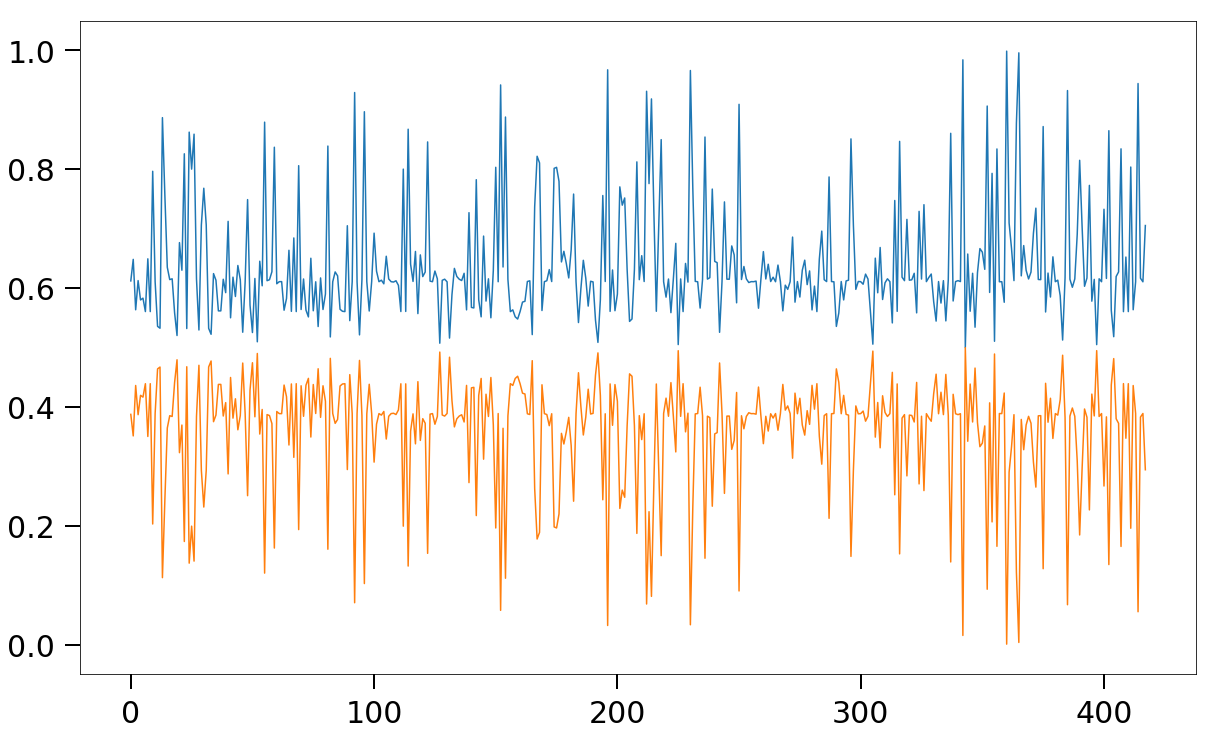

In [235]:
# probabilities
plt.rc('figure', figsize=(20, 12))
plt.plot(range(len(Probabilities)), [max(x) for x in Probabilities])
plt.plot(range(len(Probabilities)), [min(x) for x in Probabilities])
plt.tick_params(labelsize=30)
plt.tick_params(labelsize=30, length=15, width = 2, pad = 10)
plt.show()